# Chapter 8 Assignment

## Alicia Rene Jacobs

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocado_df = avocado_df.rename(columns={'Total Volume':'TotalVolume',
                      'Total Bags':'TotalBags', 'Small Bags':'SmallBags', 'Large Bags':'LargeBags', 'XLarge Bags':'XLargeBags'})
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   TotalVolume   18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   TotalBags     18249 non-null  float64
 8   SmallBags     18249 non-null  float64
 9   LargeBags     18249 non-null  float64
 10  XLargeBags    18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
avocado_df['Date']= pd.to_datetime(avocado_df['Date'])
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   TotalVolume   18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   TotalBags     18249 non-null  float64       
 8   SmallBags     18249 non-null  float64       
 9   LargeBags     18249 non-null  float64       
 10  XLargeBags    18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [6]:
avocado_df.query('year == 2015 & type=="conventional" & region == "Albany"')[['Date', 'TotalBags', 'SmallBags']].head()

,Date,TotalBags,SmallBags
0,2015-12-27,8696.87,8603.62
1,2015-12-20,9505.56,9408.07
2,2015-12-13,8145.35,8042.21
3,2015-12-06,5811.16,5677.40
4,2015-11-29,6183.95,5986.26


In [7]:
avocado_melted = pd.melt(avocado_df, id_vars = 'Date',
    value_vars=['TotalBags','SmallBags'], 
    var_name ='Bags', value_name='Count')
avocado_melted

,Date,Bags,Count
0,2015-12-27,TotalBags,8696.87
1,2015-12-20,TotalBags,9505.56
2,2015-12-13,TotalBags,8145.35
3,2015-12-06,TotalBags,5811.16
4,2015-11-29,TotalBags,6183.95
...,...,...,...
36493,2018-02-04,SmallBags,13066.82
36494,2018-01-28,SmallBags,8940.04
36495,2018-01-21,SmallBags,9351.80
36496,2018-01-14,SmallBags,10919.54


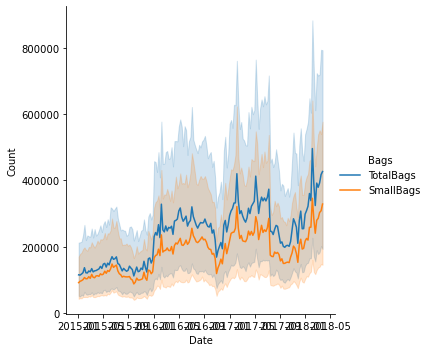

In [8]:
sns.relplot(data=avocado_melted, kind='line',
            x='Date', y='Count', hue='Bags')

In [9]:
avocado_df['SalesVolume'] = pd.qcut(avocado_df.TotalVolume, q=4,
        labels=['Poor','Modest','Good','Excellent'])
avocado_df

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,SalesVolume
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Modest
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Modest
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Good
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Modest
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Modest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Modest
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Modest
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Modest
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Modest


<AxesSubplot:xlabel='year', ylabel='count'>

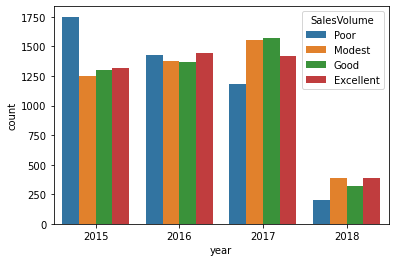

In [10]:
sns.countplot(data=avocado_df, x='year', hue='SalesVolume')

In [11]:
avocado_melt2 = avocado_df.melt(id_vars = 'year',
    value_vars=['SmallBags','LargeBags', 'XLargeBags'], 
    var_name ='Bags', value_name='Count')
avocado_melt2

,year,Bags,Count
0,2015,SmallBags,8603.62
1,2015,SmallBags,9408.07
2,2015,SmallBags,8042.21
3,2015,SmallBags,5677.40
4,2015,SmallBags,5986.26
...,...,...,...
54742,2018,XLargeBags,0.00
54743,2018,XLargeBags,0.00
54744,2018,XLargeBags,0.00
54745,2018,XLargeBags,0.00


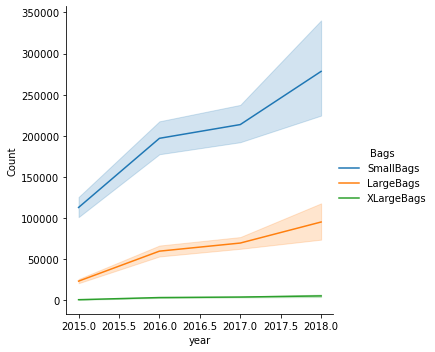

In [12]:
sns.relplot(data=avocado_melt2, kind='line',
            x='year', y='Count', hue='Bags')

## Small bags sells the best